In [1]:
from ast import literal_eval
from itertools import chain
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/raw/birdsong-recognition/train.csv')
df_test = pd.read_csv('../data/raw/birdsong-recognition/test.csv')

In [3]:
print(len(df_train))
print(len(df_test))

21375
3


In [4]:
df_train.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3     3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ...   xc_id  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...  134874   
1        36  XC135454.mp3           both  Alder Flycatcher  ...  135454   
2        39  XC135455.mp3           both  Alder Flycatcher  ...  135455   
3        33  XC135456.mp3           both  Alder Flycatcher  ...  135456   
4        36  XC135457.mp3          level  Alder Flycatcher  ...  135457   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   
2  https://www.xeno-canto.org/135455  United States       Mike Nelson   
3  https://www.xeno-canto.org/135456  United States       Mike Nelson   
4  https://www.xeno-canto.org/135457  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified   8:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
2  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
3  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
4  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   

          recordist                                            license  
0  Jonathon Jongsma        Creative Commons Attribution-ShareAlike 3.0  
1       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
2       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
3       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
4       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  

[5 rows x 35 columns]

In [5]:
df_test.head()

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

# Train

## Technical audio features

### channels

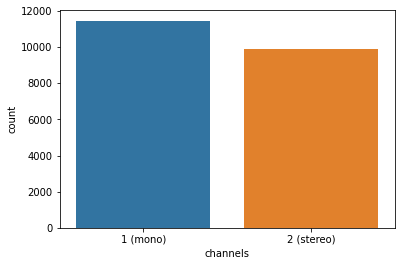

In [7]:
sb.countplot(df_train['channels'])

### duration

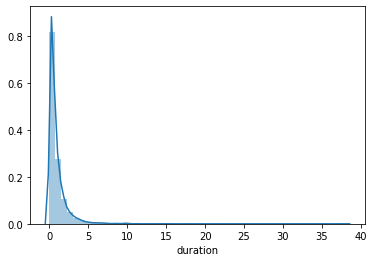

In [8]:
sb.distplot(df_train['duration'] / 60)

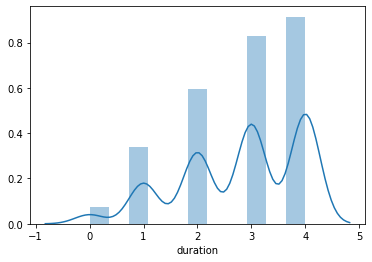

In [9]:
sb.distplot(df_train.loc[df_train['duration'] < 5, 'duration'])

In [10]:
df_train['duration']

0         25
1         36
2         39
3         33
4         36
        ... 
21370     28
21371     52
21372     96
21373     35
21374    103
Name: duration, Length: 21375, dtype: int64

### sampling_rate

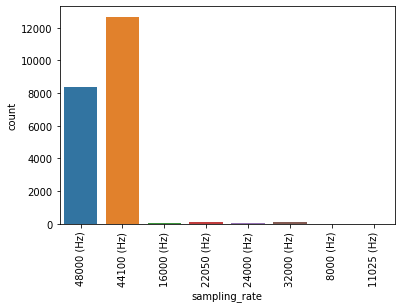

In [11]:
sb.countplot(df_train['sampling_rate'])
plt.xticks(rotation=90);

### bitrate_of_mp3

In [12]:
df_train['bitrate_of_mp3'].value_counts()

128000 (bps)    11589
320000 (bps)     2850
192000 (bps)     2511
256000 (bps)      507
96000 (bps)       392
                ...  
95189 (bps)         1
173610 (bps)        1
252608 (bps)        1
102563 (bps)        1
307722 (bps)        1
Name: bitrate_of_mp3, Length: 2583, dtype: int64

### file_type

In [13]:
df_train['file_type'].value_counts()

mp3    21367
wav        6
mp2        1
aac        1
Name: file_type, dtype: int64

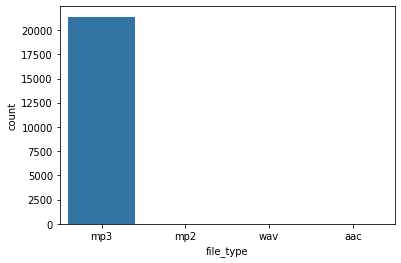

In [14]:
sb.countplot(df_train['file_type'])

### length

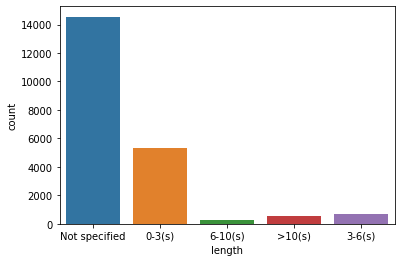

In [15]:
sb.countplot(df_train['length'].fillna('Null'))

## Observation audio features

### pitch

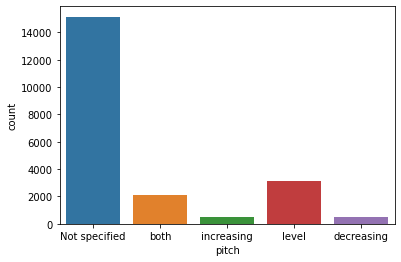

In [16]:
sb.countplot(df_train['pitch'])

### speed

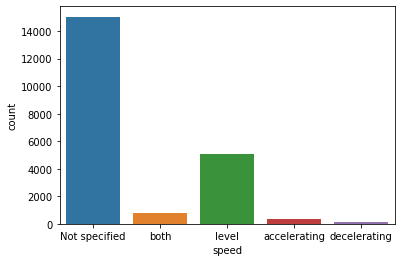

In [17]:
sb.countplot(df_train['speed'])

### volume

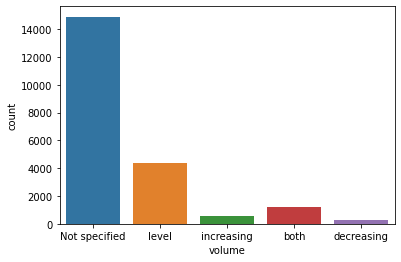

In [18]:
sb.countplot(df_train['volume'])

### number_of_notes

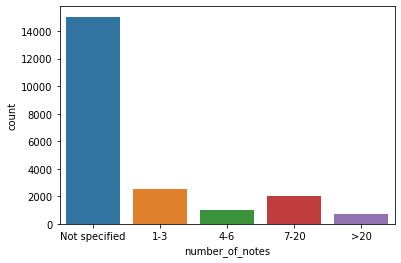

In [19]:
sb.countplot(df_train['number_of_notes'])

## Observation location features

### country

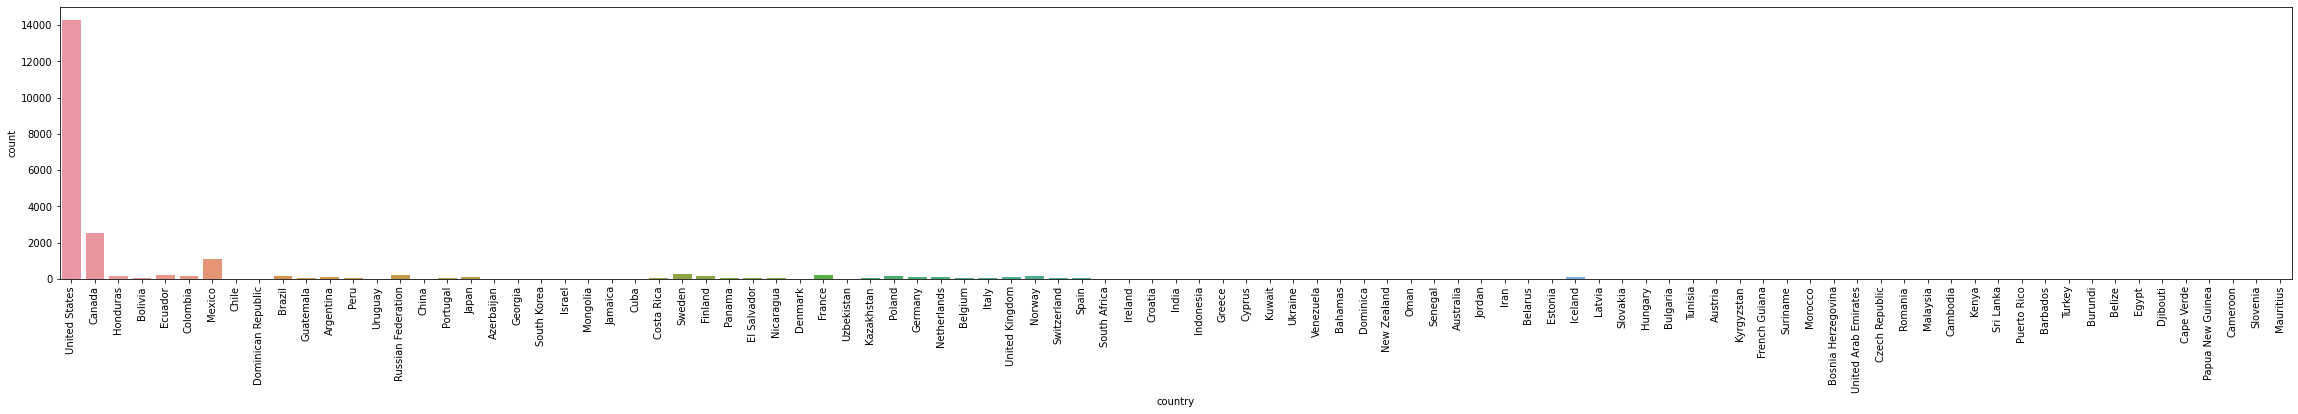

In [20]:
plt.figure(figsize=(40, 5))
sb.countplot(df_train['country']);
plt.xticks(rotation=90);

### location

In [21]:
df_train['location'].head()

0          Grey Cloud Dunes SNA, Washington, Minnesota
1     Carver's Gap Parking area, Roan Mountain Stat...
2     Carver's Gap Parking area, Roan Mountain Stat...
3     Carver's Gap Parking area, Roan Mountain Stat...
4     Carver's Gap Parking area, Roan Mountain Stat...
Name: location, dtype: object

### latitude

### longitude

### elevation

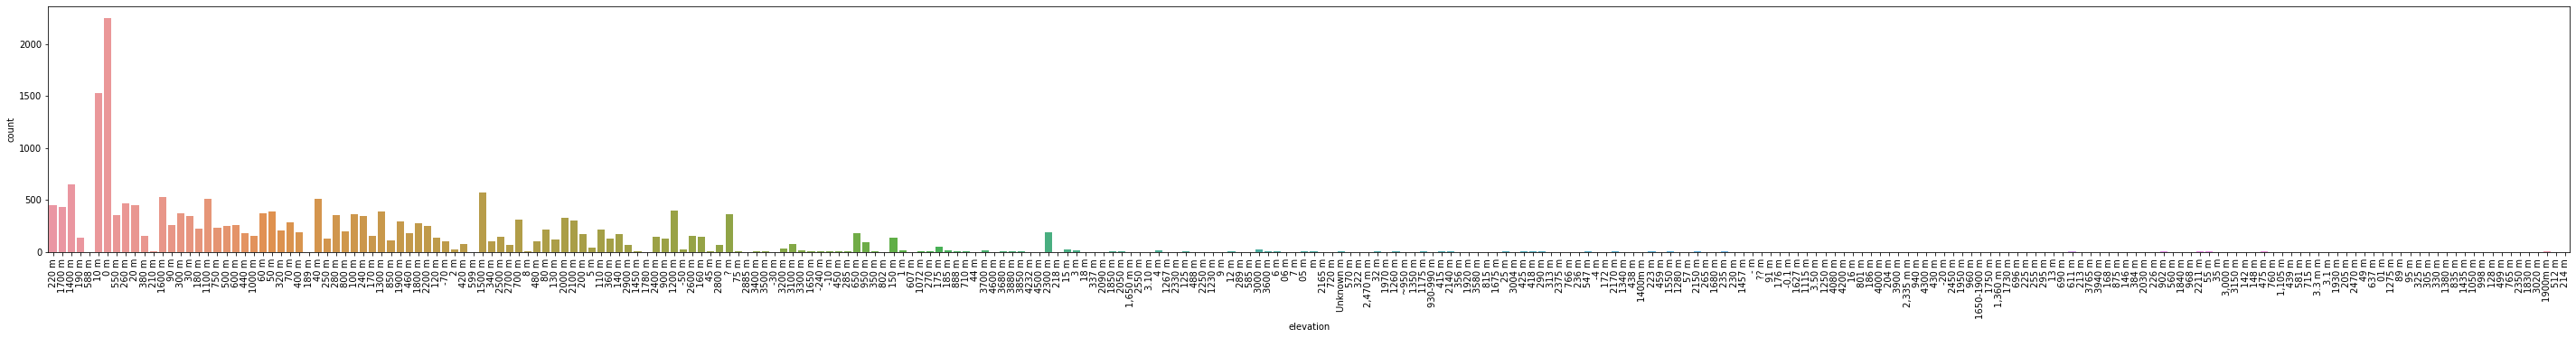

In [22]:
plt.figure(figsize=(50, 5))
sb.countplot(df_train['elevation'])
plt.xticks(rotation=90);

### rating

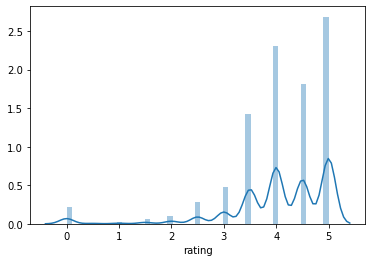

In [23]:
sb.distplot(df_train['rating'])

### bird_seen

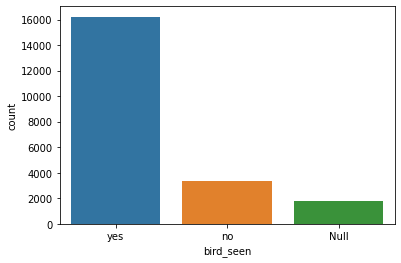

In [24]:
sb.countplot(df_train['bird_seen'].fillna('Null'))

## Labels

### primary_label

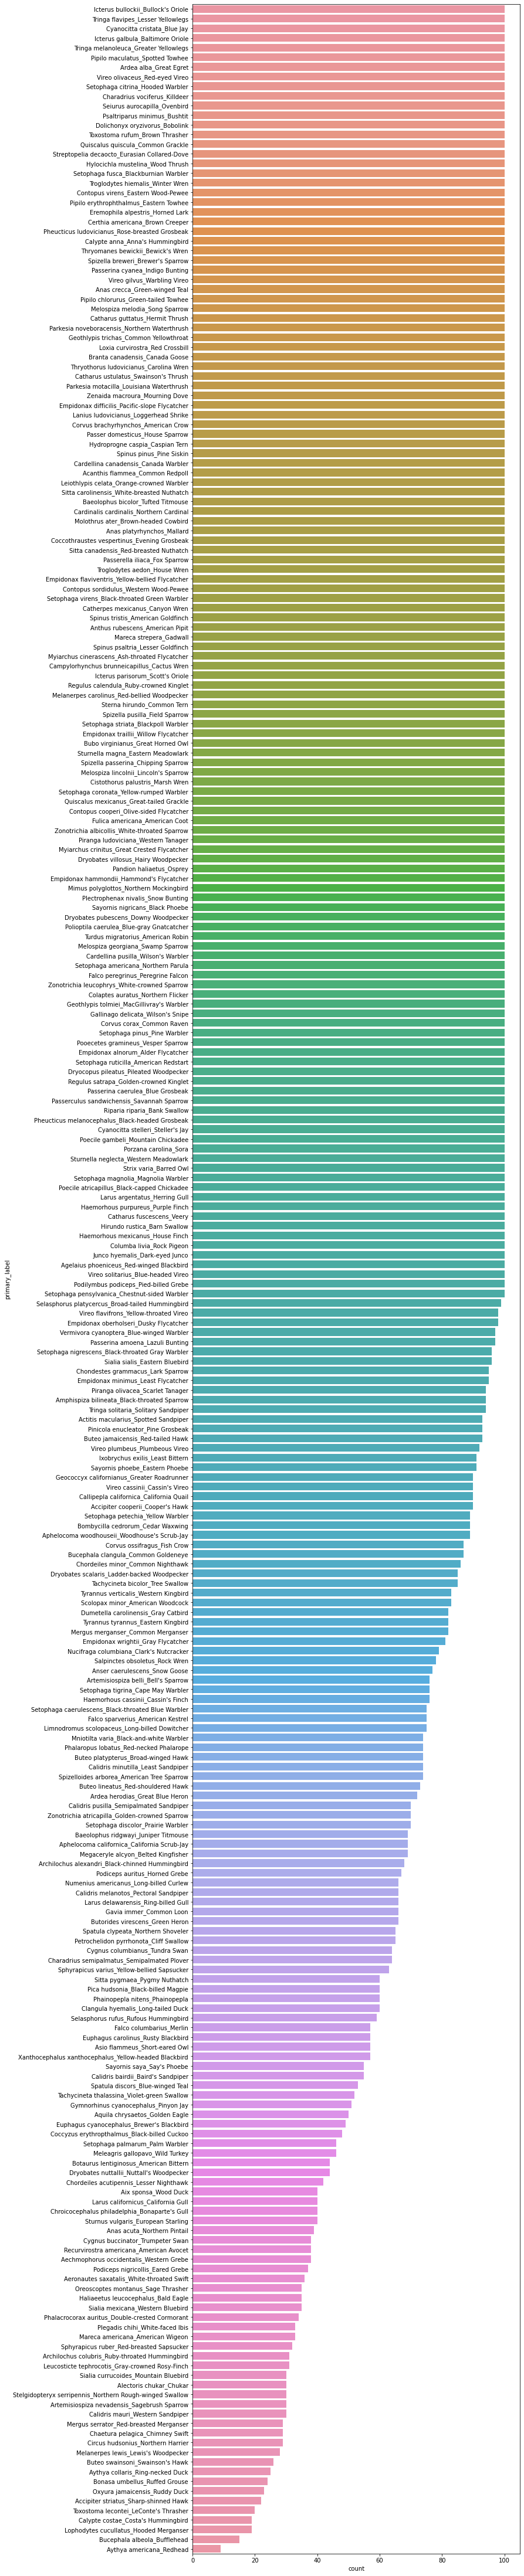

In [25]:
plt.figure(figsize=(10, 80))
sb.countplot(
    y=df_train['primary_label'],
    order = df_train['primary_label'].value_counts().index
)

In [39]:
primary_labels_set = set(df_train['primary_label'].unique())

In [41]:
len(primary_labels_set)

264

### secondary_labels

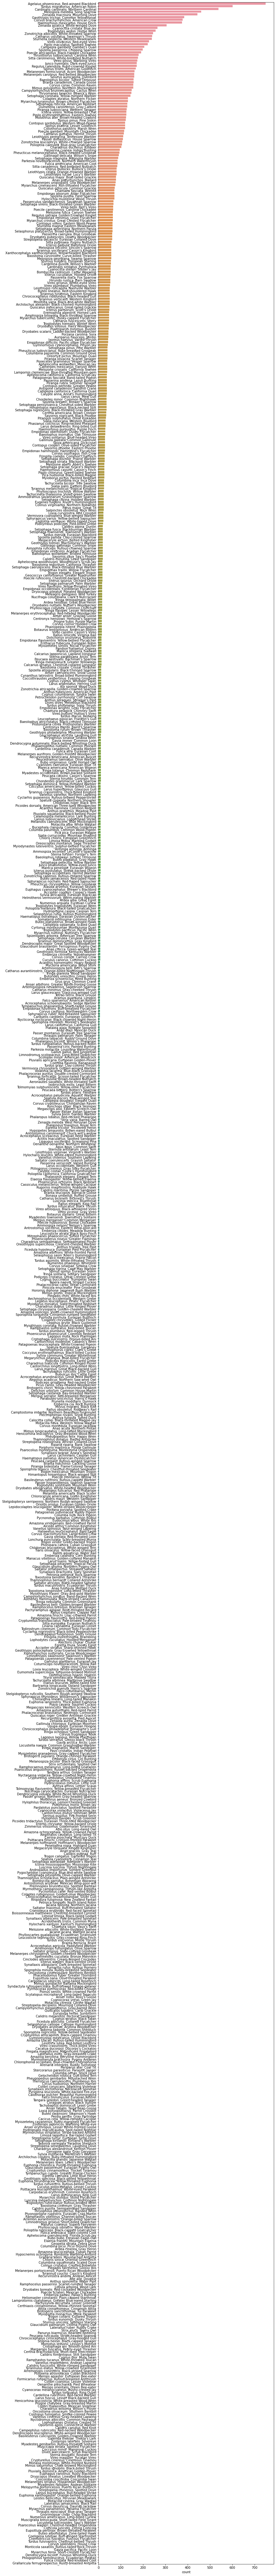

In [38]:
plt.figure(figsize=(10, 150))
secondary_labels = pd.Series(chain(*df_train['secondary_labels'].apply(literal_eval)))
sb.countplot(
    y=secondary_labels,
    order=secondary_labels.value_counts().index
)

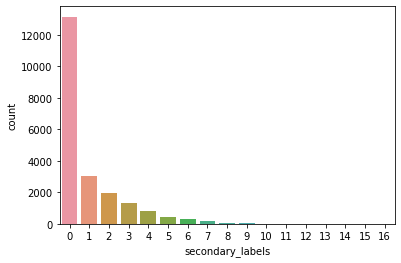

In [53]:
sb.countplot(df_train['secondary_labels'].apply(literal_eval).apply(len))

In [42]:
secondary_labels_set = set(secondary_labels.values)

In [44]:
len(secondary_labels_set)

946

In [45]:
len(secondary_labels_set & primary_labels_set)

252

In [34]:
len(secondary_labels)

5385

In [54]:
ebird_code_to_label = {}
for item in df_train.itertuples():
    if item.ebird_code not in ebird_code_to_label:
        ebird_code_to_label[item.ebird_code] = item.primary_label

In [56]:
ebird_code_to_label

{'aldfly': 'Empidonax alnorum_Alder Flycatcher',
 'ameavo': 'Recurvirostra americana_American Avocet',
 'amebit': 'Botaurus lentiginosus_American Bittern',
 'amecro': 'Corvus brachyrhynchos_American Crow',
 'amegfi': 'Spinus tristis_American Goldfinch',
 'amekes': 'Falco sparverius_American Kestrel',
 'amepip': 'Anthus rubescens_American Pipit',
 'amered': 'Setophaga ruticilla_American Redstart',
 'amerob': 'Turdus migratorius_American Robin',
 'amewig': 'Mareca americana_American Wigeon',
 'amewoo': 'Scolopax minor_American Woodcock',
 'amtspa': 'Spizelloides arborea_American Tree Sparrow',
 'annhum': "Calypte anna_Anna's Hummingbird",
 'astfly': 'Myiarchus cinerascens_Ash-throated Flycatcher',
 'baisan': "Calidris bairdii_Baird's Sandpiper",
 'baleag': 'Haliaeetus leucocephalus_Bald Eagle',
 'balori': 'Icterus galbula_Baltimore Oriole',
 'banswa': 'Riparia riparia_Bank Swallow',
 'barswa': 'Hirundo rustica_Barn Swallow',
 'bawwar': 'Mniotilta varia_Black-and-white Warbler',
 'belkin1

### ebird_code

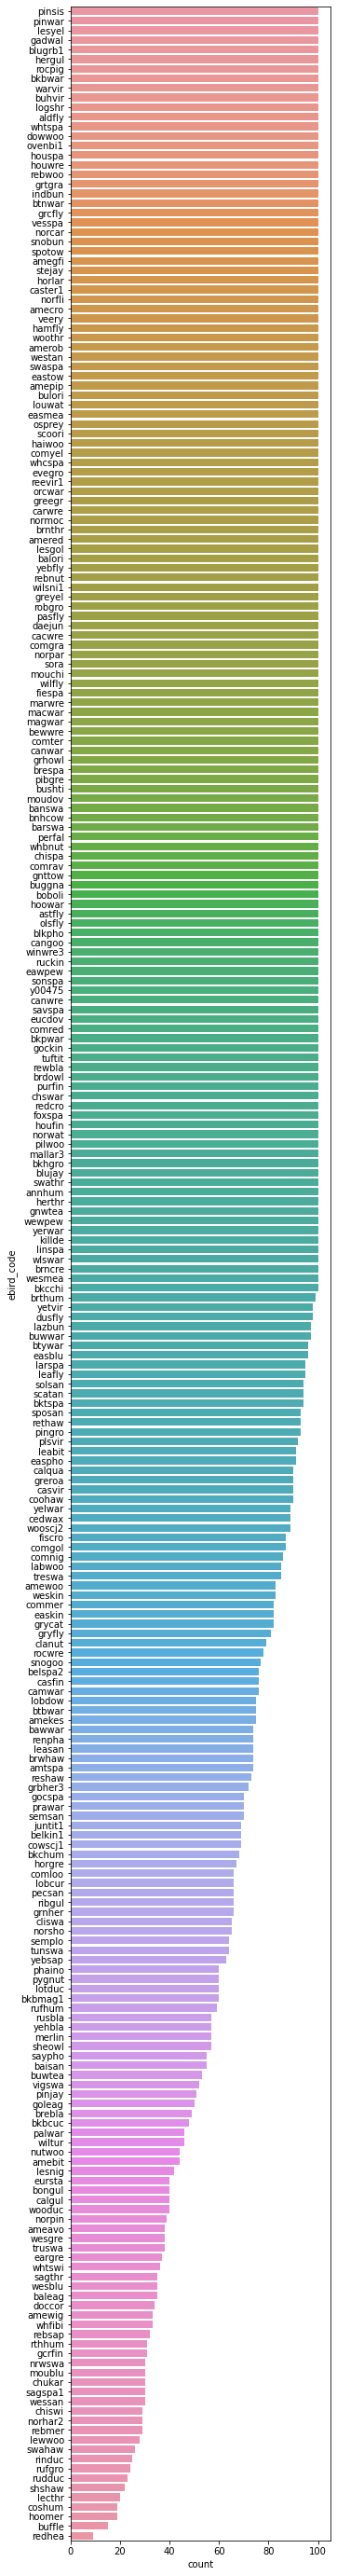

In [27]:
plt.figure(figsize=(5, 50))
sb.countplot(
    y=df_train['ebird_code'],
    order=df_train['ebird_code'].value_counts().index
)

In [28]:
df_train['ebird_code'].unique()

array(['aldfly', 'ameavo', 'amebit', 'amecro', 'amegfi', 'amekes',
       'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amtspa',
       'annhum', 'astfly', 'baisan', 'baleag', 'balori', 'banswa',
       'barswa', 'bawwar', 'belkin1', 'belspa2', 'bewwre', 'bkbcuc',
       'bkbmag1', 'bkbwar', 'bkcchi', 'bkchum', 'bkhgro', 'bkpwar',
       'bktspa', 'blkpho', 'blugrb1', 'blujay', 'bnhcow', 'boboli',
       'bongul', 'brdowl', 'brebla', 'brespa', 'brncre', 'brnthr',
       'brthum', 'brwhaw', 'btbwar', 'btnwar', 'btywar', 'buffle',
       'buggna', 'buhvir', 'bulori', 'bushti', 'buwtea', 'buwwar',
       'cacwre', 'calgul', 'calqua', 'camwar', 'cangoo', 'canwar',
       'canwre', 'carwre', 'casfin', 'caster1', 'casvir', 'cedwax',
       'chispa', 'chiswi', 'chswar', 'chukar', 'clanut', 'cliswa',
       'comgol', 'comgra', 'comloo', 'commer', 'comnig', 'comrav',
       'comred', 'comter', 'comyel', 'coohaw', 'coshum', 'cowscj1',
       'daejun', 'doccor', 'dowwoo', 'dusfly', 'eargre',

In [29]:
encoded_labels = {k: v for v, k in enumerate(df_train['ebird_code'].unique())}

In [30]:
print(encoded_labels)

{'aldfly': 0, 'ameavo': 1, 'amebit': 2, 'amecro': 3, 'amegfi': 4, 'amekes': 5, 'amepip': 6, 'amered': 7, 'amerob': 8, 'amewig': 9, 'amewoo': 10, 'amtspa': 11, 'annhum': 12, 'astfly': 13, 'baisan': 14, 'baleag': 15, 'balori': 16, 'banswa': 17, 'barswa': 18, 'bawwar': 19, 'belkin1': 20, 'belspa2': 21, 'bewwre': 22, 'bkbcuc': 23, 'bkbmag1': 24, 'bkbwar': 25, 'bkcchi': 26, 'bkchum': 27, 'bkhgro': 28, 'bkpwar': 29, 'bktspa': 30, 'blkpho': 31, 'blugrb1': 32, 'blujay': 33, 'bnhcow': 34, 'boboli': 35, 'bongul': 36, 'brdowl': 37, 'brebla': 38, 'brespa': 39, 'brncre': 40, 'brnthr': 41, 'brthum': 42, 'brwhaw': 43, 'btbwar': 44, 'btnwar': 45, 'btywar': 46, 'buffle': 47, 'buggna': 48, 'buhvir': 49, 'bulori': 50, 'bushti': 51, 'buwtea': 52, 'buwwar': 53, 'cacwre': 54, 'calgul': 55, 'calqua': 56, 'camwar': 57, 'cangoo': 58, 'canwar': 59, 'canwre': 60, 'carwre': 61, 'casfin': 62, 'caster1': 63, 'casvir': 64, 'cedwax': 65, 'chispa': 66, 'chiswi': 67, 'chswar': 68, 'chukar': 69, 'clanut': 70, 'cliswa': 

### species

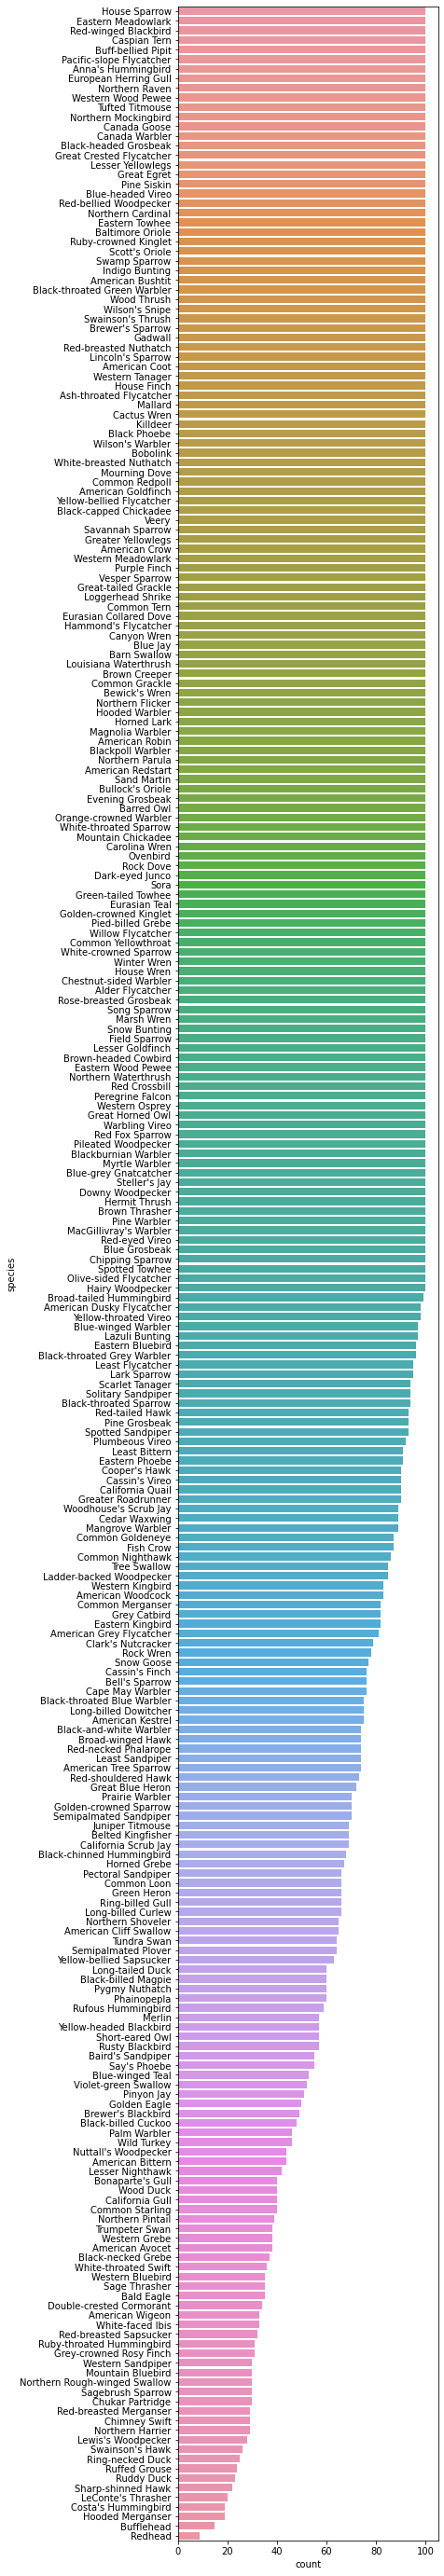

In [111]:
plt.figure(figsize=(5, 50))
sb.countplot(
    y=df_train['species'],
    order=df_train['species'].value_counts().index
)

### background

In [119]:
background = pd.Series(chain(*df_train['background'].apply(lambda x: [y.strip() for y in x.split(';')] if not pd.isnull(x) else [])))

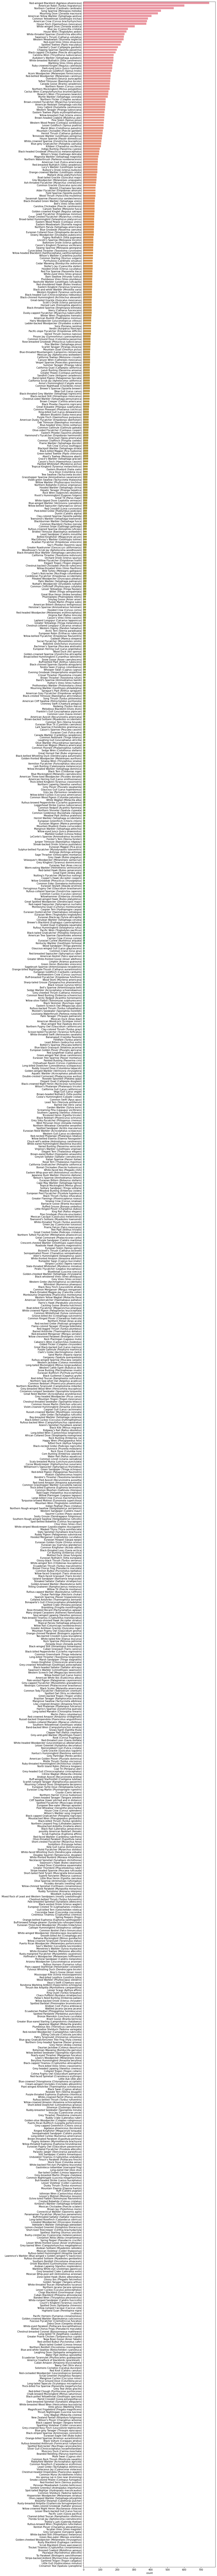

In [120]:
plt.figure(figsize=(10, 200))
sb.countplot(
    y=background,
    order=background.value_counts().index
)

### sci_name

### type

### description

### xc_id

In [58]:
df_train['xc_id'].head()

0    134874
1    135454
2    135455
3    135456
4    135457
Name: xc_id, dtype: int64

### url

### author

### time

### recordist

### licence

# Test

In [122]:
df_test.head()

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

In [123]:
df_test_meta = pd.read_csv('../data/raw/birdsong-recognition/example_test_audio_metadata.csv')

In [124]:
df_test_meta.head()

file_id        device      date   hour source  \
0  BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
1  ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
2  BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
3  BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
4  ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   

  ebird_code certainty vox_type  time_start  time_end  channel  
0     westan         c     call    0.255394  0.858845        2  
1   squirrel         c     call    0.415966  1.410334        1  
2     gockin         l     call    0.590725  1.944412        2  
3     mouchi         c     call    1.609081  2.130985        2  
4     brncre         c     song    2.461655  2.746925        1